<h1>Network of Reddit Users with Negative Sentiments (Covid19 Lockdown)</h1>

Objective: 
- To find out which author on Reddit is the most negative based its interaction with other authors (determined by the edge weight/frequency) in the coronavirus anti lockdown subreddit and possibly showcase some comments which have been posted by that author of interest

Findings:
- Most negative author: Johari82

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
reddit_sentiments = pd.read_csv('../Reddit_Sentiments/covid19_sentiments.csv')

In [3]:
reddit_sentiments

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,cluster,sentiment_polarity_summary
0,0,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Skooter_McGaven,i wish understand major new infect come is ove...,1,0.9274,2,positive
1,1,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Richandler,is overli famili spread i believ german heinsb...,0,0.4939,2,positive
2,2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,thi sound horribl i hate littl thought i today...,0,-0.1531,1,neutral
3,3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,my husband i yet confirm we wait result but le...,0,-0.7579,0,negative
4,4,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,ZombiGrn,in neighborhood peopl start throw parti left r...,0,0.6124,2,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,McGloin_the_GOAT,thi econom analysi econom decis made margin me...,0,0.2960,2,positive
886,886,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,Zamaamiro,thi sub seem attract r lockdownskeptic poster ...,1,0.2732,1,neutral
887,887,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,NaN,i say true thi sub like commun hover around ce...,0,0.9607,2,positive
888,888,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,jphamlore,fortun anoth model ihm capabl make precis reco...,1,0.4939,2,positive


In [4]:
# Create new DataFrame for forming a network graph

user_networks = reddit_sentiments.filter(['author','commenter','comment'], axis=1)
user_networks['type'] = ['Undirected'] * user_networks.shape[0]
user_networks['weight'] = [1] * user_networks.shape[0]
user_networks

,author,commenter,comment,type,weight
0,Johari82,Skooter_McGaven,i wish understand major new infect come is ove...,Undirected,1
1,Johari82,Richandler,is overli famili spread i believ german heinsb...,Undirected,1
2,Johari82,NaN,thi sound horribl i hate littl thought i today...,Undirected,1
3,Johari82,lcbk,my husband i yet confirm we wait result but le...,Undirected,1
4,Johari82,ZombiGrn,in neighborhood peopl start throw parti left r...,Undirected,1
...,...,...,...,...,...
885,StudentjeNL,McGloin_the_GOAT,thi econom analysi econom decis made margin me...,Undirected,1
886,StudentjeNL,Zamaamiro,thi sub seem attract r lockdownskeptic poster ...,Undirected,1
887,StudentjeNL,NaN,i say true thi sub like commun hover around ce...,Undirected,1
888,StudentjeNL,jphamlore,fortun anoth model ihm capabl make precis reco...,Undirected,1


In [5]:
# Check for correctness

author = user_networks[user_networks['author'] == 'signed7']
author

,author,commenter,comment,type,weight


In [6]:
# Preview edge weight

edges = user_networks.groupby(['author','commenter']).agg({'weight':'sum'}).reset_index()
edges

,author,commenter,weight
0,FC37,AutoModerator,1
1,FC37,EmpathyFabrication,1
2,FC37,FC37,3
3,FC37,knitandpolish,1
4,FC37,renzpolster,1
...,...,...,...
537,zeaqqk,DURIAN8888,1
538,zeaqqk,WitnessNo8046,2
539,zeaqqk,armageddon_20xx,1
540,zeaqqk,pinganeto,1


In [7]:
# Sort DataFrame based on descending edge weight

edges.sort_values('weight', ascending=False).head()

,author,commenter,weight
76,Johari82,JenniferColeRhuk,16
475,p44v9n,NobodyKnowsYourName2,5
390,john_wb,JenniferColeRhuk,5
416,john_wb,statlaw,5
502,p44v9n,p44v9n,5


In [8]:
# Create a network graph

network = nx.from_pandas_edgelist(edges, 
                            source='author',
                            target='commenter',
                            edge_attr='weight' )

In [9]:
# Get network graph nodes (author) and edges (interaction) info

print(nx.info(network))

Graph with 484 nodes and 542 edges


<ipython-input-9-06ea12accad0>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [10]:
# Get network graph degree per node

weighted_degrees = dict(nx.degree(network, weight='weight'))
# weighted_degrees
# print(sum(weighted_degrees.values()))
# print(len(weighted_degrees.values()))
avg_degree = sum(weighted_degrees.values()) / len(weighted_degrees.values())
avg_degree

2.727272727272727

In [11]:
subGraph = network.subgraph([n for n in weighted_degrees if weighted_degrees[n] > 2.35])

In [12]:
# Focus on sub network with a considerable high degree centrality

print(nx.info(subGraph))

Graph with 42 nodes and 87 edges


<ipython-input-12-f52f3a138b15>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subGraph))


In [13]:
# Create subgraph's network 

pos = nx.spring_layout(network, weight='weight', iterations=20, k=4)

<ipython-input-14-6182e96bfc01>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


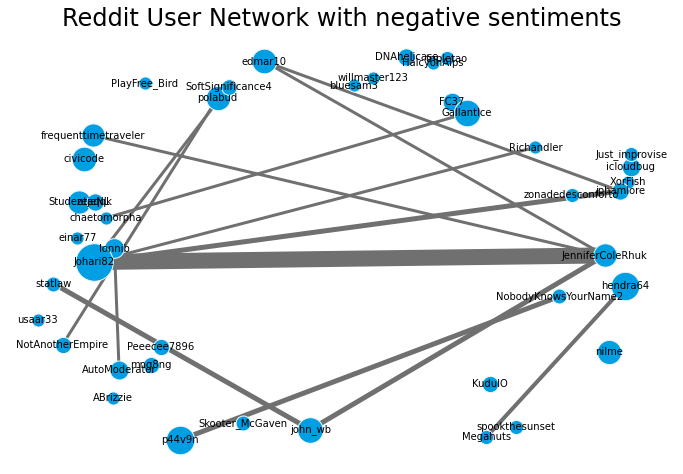

In [14]:
# Plot subgraph's network

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with negative sentiments', fontsize = 24)


for node in subGraph.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subGraph, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subGraph, pos, {n:n.replace('-','\n') for n in subGraph.nodes() if weighted_degrees[n]>avg_degree},font_size=10);

for e in subGraph.edges(data=True):
    if e[2]['weight']>avg_degree:
        nx.draw_networkx_edges(subGraph, pos,[e], width=e[2]['weight'], edge_color='#707070')
        
fig.set_size_inches(figsize * 2)
fig.show()
plt.savefig('../Reddit_Output/Reddit_SNA_COVID19_Lockdown.png')

In [15]:
# Most negative user and its comments
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
author = reddit_sentiments[(reddit_sentiments['author'] == 'Johari82') & (reddit_sentiments['sentiment_polarity'] == 'negative')]
author

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,cluster,sentiment_polarity_summary


In [16]:
# Node-level Statistics
# Normalize - Better for comparison between different networks

print("Number of nodes in subGraph: ", subGraph.number_of_nodes())
print("==========================================")
print("Number of edges in subGraph: ", subGraph.number_of_edges())
print("==========================================")
print("Nodes' Degree Centrality (Non-Normalized) in subGraph: ", nx.degree(subGraph))
print("==========================================")
print("Nodes' Degree Centrality (Normalized) in subGraph: ", nx.degree_centrality(subGraph))

Number of nodes in subGraph:  42
Number of edges in subGraph:  87
Nodes' Degree Centrality (Non-Normalized) in subGraph:  [('Peeecee7896', 3), ('spookthesunset', 2), ('usaar33', 2), ('edmar10', 9), ('XorFish', 3), ('FC37', 3), ('JenniferColeRhuk', 6), ('hendra64', 8), ('mng8ng', 1), ('einar77', 2), ('tripletao', 3), ('icloudbug', 2), ('lonnib', 3), ('StudentjeNL', 4), ('zonadedesconforto', 4), ('GallantIce', 7), ('polabud', 7), ('frequenttimetraveler', 8), ('Johari82', 12), ('willmaster123', 2), ('statlaw', 1), ('NobodyKnowsYourName2', 1), ('civicode', 9), ('AutoModerator', 9), ('Skooter_McGaven', 4), ('zeaqqk', 3), ('SoftSignificance4', 3), ('jphamlore', 3), ('DNAhelicase', 7), ('Richandler', 1), ('john_wb', 7), ('bluesam3', 2), ('p44v9n', 6), ('PlayFree_Bird', 3), ('chaetomorpha', 1), ('HalcyonAlps', 2), ('ABrizzie', 2), ('Just_improvise', 3), ('KuduIO', 3), ('Megahuts', 1), ('nilme', 7), ('NotAnotherEmpire', 5)]
Nodes' Degree Centrality (Normalized) in subGraph:  {'Peeecee7896': 0.0

In [17]:
# Node-level Statistics

print("Nodes' Closeness Centrality in subGraph: ", nx.closeness_centrality(subGraph))
print("==========================================")
print("Nodes' Eigenvector Centrality in subGraph: ", nx.eigenvector_centrality(subGraph))
print("==========================================")
print("Nodes' Betweenness Centrality (Normalized) in subGraph: ", nx.betweenness_centrality(subGraph, normalized=True))

Nodes' Closeness Centrality in subGraph:  {'Peeecee7896': 0.30597014925373134, 'spookthesunset': 0.3360655737704918, 'usaar33': 0.3360655737704918, 'edmar10': 0.44086021505376344, 'XorFish': 0.3153846153846154, 'FC37': 0.30597014925373134, 'JenniferColeRhuk': 0.41836734693877553, 'hendra64': 0.3333333333333333, 'mng8ng': 0.29927007299270075, 'einar77': 0.3106060606060606, 'tripletao': 0.36936936936936937, 'icloudbug': 0.35344827586206895, 'lonnib': 0.30597014925373134, 'StudentjeNL': 0.2827586206896552, 'zonadedesconforto': 0.3942307692307692, 'GallantIce': 0.35964912280701755, 'polabud': 0.37272727272727274, 'frequenttimetraveler': 0.45054945054945056, 'Johari82': 0.4659090909090909, 'willmaster123': 0.3253968253968254, 'statlaw': 0.3178294573643411, 'NobodyKnowsYourName2': 0.25949367088607594, 'civicode': 0.4019607843137255, 'AutoModerator': 0.43617021276595747, 'Skooter_McGaven': 0.41, 'zeaqqk': 0.30597014925373134, 'SoftSignificance4': 0.36936936936936937, 'jphamlore': 0.3565217391

In [18]:
# Network-level Statistics

print("Network Density in subGraph: ", nx.density(subGraph))
print("==========================================")
print("Network Diameter in subGraph: ", nx.diameter(subGraph))
print("==========================================")
print("Network Average path length in subGraph: ", nx.average_shortest_path_length(subGraph))

Network Density in subGraph:  0.10104529616724739
Network Diameter in subGraph:  6
Network Average path length in subGraph:  2.8919860627177703


In [19]:
# Network-level Statistics

num_max_reachable_other_nodes = subGraph.number_of_nodes() - 1

print("Total number of reachable other nodes: ", num_max_reachable_other_nodes)
node_list = list(subGraph.nodes)  # All nodes - we will iterate through this list, one node at a time

node_reachability_list = []
for node in node_list:
    # Retrieve 'descendants' or all reachable other nodes
    # nx.descendants returns a Set
    desc = nx.descendants(subGraph, node)
    
    # How many other nodes are reachable from this node?
    num_reachable_from_this_node = len(desc)
    node_reachability = num_reachable_from_this_node / num_max_reachable_other_nodes
    print("==========================================")
    print("Current node is", node, " and node-level reachability is", node_reachability)
    print(desc)
    node_reachability_list.append(node_reachability)
    
print("\n################ Network-level Reachability ################")
print( sum(node_reachability_list) / len(node_reachability_list) )

Total number of reachable other nodes:  41
Current node is Peeecee7896  and node-level reachability is 1.0
{'spookthesunset', 'usaar33', 'edmar10', 'XorFish', 'FC37', 'JenniferColeRhuk', 'hendra64', 'mng8ng', 'einar77', 'tripletao', 'lonnib', 'icloudbug', 'StudentjeNL', 'zonadedesconforto', 'GallantIce', 'polabud', 'frequenttimetraveler', 'willmaster123', 'Johari82', 'statlaw', 'NobodyKnowsYourName2', 'civicode', 'AutoModerator', 'Skooter_McGaven', 'zeaqqk', 'SoftSignificance4', 'jphamlore', 'john_wb', 'DNAhelicase', 'Richandler', 'bluesam3', 'p44v9n', 'PlayFree_Bird', 'HalcyonAlps', 'chaetomorpha', 'ABrizzie', 'Just_improvise', 'KuduIO', 'Megahuts', 'nilme', 'NotAnotherEmpire'}
Current node is spookthesunset  and node-level reachability is 1.0
{'Peeecee7896', 'usaar33', 'edmar10', 'XorFish', 'FC37', 'JenniferColeRhuk', 'hendra64', 'mng8ng', 'einar77', 'tripletao', 'icloudbug', 'lonnib', 'StudentjeNL', 'zonadedesconforto', 'GallantIce', 'polabud', 'frequenttimetraveler', 'Johari82', 'w